# 假設檢定(Hypothesis Testing)

## 假設檢定是先對母體參數提出假設， 然後利用樣本的資訊，再決定是否接受或否決該假設。

## 單樣本, 單邊檢定(Single-Sample, One-Sided Tests)
### 假設一組隨機資料，檢定學生對數學課程的評價

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Min:-5
Max:5
Mean:0.84


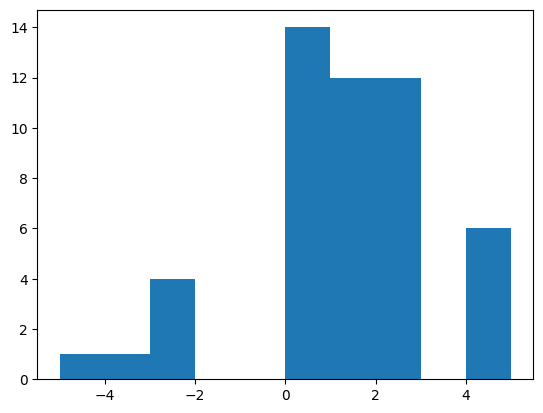

In [2]:
np.random.seed(123)
lo = np.random.randint(-5, -1, 6)
mid = np.random.randint(0, 3, 38)
hi = np.random.randint(4, 6, 6)
sample = np.append(lo,np.append(mid, hi))
print("Min:" + str(sample.min()))
print("Max:" + str(sample.max()))
print("Mean:" + str(sample.mean()))

plt.hist(sample)
plt.show()

### 檢定學生是否喜歡這門課
### 虛無假設(null hypothesis, H0)：學生不喜歡這門課，評分不大於0
### 對立假設(alternative hypothesis, H1)：學生喜歡這門課，評分大於0
### $\begin{equation}H_{0}: \mu \le 0 \\ H_{1}: \mu > 0 \end{equation}$

## 依據中央極限定理，任何分配的平均數分布均符合常態分配。

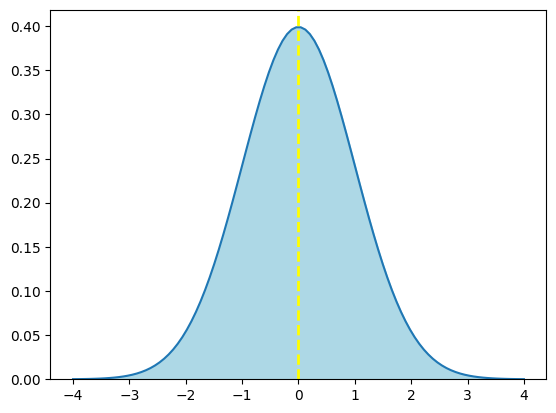

In [5]:
from scipy.stats import norm

mean = 0
std = 1
x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)
a = np.linspace(mean - 4 * std, mean + 4 * std, 100)
b = norm.pdf(a, mean, std)
plt.fill_between(a, b, 0, color = 'lightblue') 
plt.ylim(0);
plt.axvline(mean, color='yellow', linestyle='dashed', linewidth=2)
plt.show()

### 使用 t-test，檢定平均數是否顯著差異，t-test是基於 student's t 分配的統計量，它類似常態分配，但較扁平(厚尾)。
### 當樣本數>=30時， t-test 趨近於  z-test。
### 單樣本(single sample)檢定是指檢定 一組樣本平均數與母體的平均數是否有顯著差異。雙樣本(two sample)檢定是指兩組樣本平均數是否有差異。
### 單邊檢定(One-Sided Test or One-tailed Test)：檢查樣本平均數是否大於母體的平均數。
## $\begin{equation}t = \frac{\bar{x} - \mu}{s \div \sqrt{n}} \end{equation}$

## 單邊檢定

t-statistic:2.773584905660377
p-value:0.003910863257949543


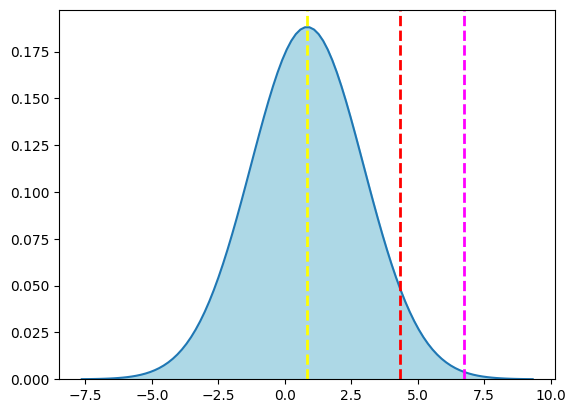

In [6]:
from scipy import stats

mean = np.mean(sample)
std = np.std(sample)
x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)
a = np.linspace(mean - 4 * std, mean + 4 * std, 100)
b = norm.pdf(a, mean, std)
plt.fill_between(a, b, 0, color = 'lightblue') 
plt.ylim(0);
plt.axvline(mean, color='yellow', linestyle='dashed', linewidth=2)

# T-Test, alternative='greater': 右尾檢定
# SciPy v1.6 支援單邊檢定
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
t,p = stats.ttest_1samp(sample, 0, alternative='greater')
print ("t-statistic:" + str(t))
print("p-value:" + str(p))

# 顯著水準 5%
ci = stats.norm.interval(0.90, mean, std)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(mean + t*std, color='magenta', linestyle='dashed', linewidth=2)
plt.show()

## 說明
#### 黃線：平均數
#### 紫線：樣本計算出來的平均數
#### 紅線：1.96倍標準差

### 使用 ttest_1samp檢定，預設為雙邊檢定。
### 臨界值(critical value)：即紅線，紅線右邊所佔的機率為**&alpha;**，通常為 0.05(1.96倍標準差)。
### p-value：紫線右邊所佔的機率，即樣本計算出來的平均數在母體分配的位置，= 1-cdf。

#### 如果 p < 0.05 ==> 拒絕虛無假設，表示樣本平均數與母體平均數有顯著差異。
#### 如果 p > 0.05 ==> 不能拒絕虛無假設，表示不能證明有顯著差異，差異有可能是隨機抽樣誤差造成的。

## 結論：H1成立，學生喜歡數學課程。

## [疫苗試驗成功 逾8成病人有免疫反應](https://news.ltn.com.tw/news/focus/paper/960677)
## [浩鼎藥未過關 杜紫宸狠批翁啟惠](https://anntw.com/articles/20160222-7ATG)

## 雙邊檢定(Two-Tailed Tests)
### $\begin{equation}H_{0}: \mu = 0 \\ H_{1}: \mu \neq 0 \end{equation}$
### H1 != 0 ==> 表示不只要考慮正值，也要考慮負值。
### 雙邊檢定時，假設顯著水準(&alpha;) 為 0.05，則左右兩邊各 0.025(2.5%)，因此，p值<0.025，才算有顯著差異，為統一起見，我們通常將p值乘以2，仍跟 0.05 比較，ttest_1samp會自動調整p值，一律與設定的顯著水準比較即可。

t-statistic:2.773584905660377
p-value:0.007822


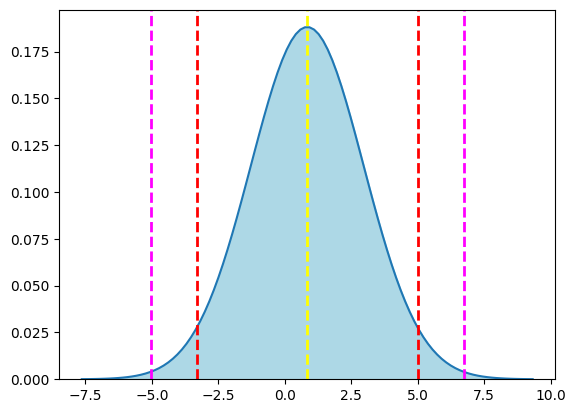

In [7]:
mean = np.mean(sample)
std = np.std(sample)
x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)
a = np.linspace(mean - 4 * std, mean + 4 * std, 100)
b = norm.pdf(a, mean, std)
plt.fill_between(a, b, 0, color = 'lightblue') 
plt.ylim(0);
plt.axvline(mean, color='yellow', linestyle='dashed', linewidth=2)

# T-Test
t,p = stats.ttest_1samp(sample, 0)
print ("t-statistic:" + str(t))
# ttest_1samp is 2-tailed
print("p-value:" + '%f' % p)
# calculate a 95% confidence interval. 50% of the probability is outside this, 2.5% in each tail
ci = stats.norm.interval(0.95, mean, std)

# show the confidence interval thresholds - 5% of propbability is under the curve outside these.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)

# show the t-statistic thresholds - the p-value is the area under the curve outside these
plt.axvline(mean - t*std, color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(mean + t*std, color='magenta', linestyle='dashed', linewidth=2)
plt.show()

### p-value < 0.05，拒絕虛無假設。

## 雙樣本的檢定(Two-Sample Tests)
### $\begin{equation}H_{0}: \mu_{1} \le \mu_{2} \\ H_{1}: \mu_{1} > \mu_{2} \end{equation}$
### 通常一組為實驗組(Treatment group)，另一組為對照組(Control group)。
### 以新藥實驗為例，實驗組服用新藥，對照組服用安慰劑。

## 數理科學生與非數理科學生學習統計，檢定考試成績是否有差異。

non-math sample mean:66.04066361023553
math sample mean:66.52069665713476
t-statistic:2.140008413392296
p-value:0.016788843337552935


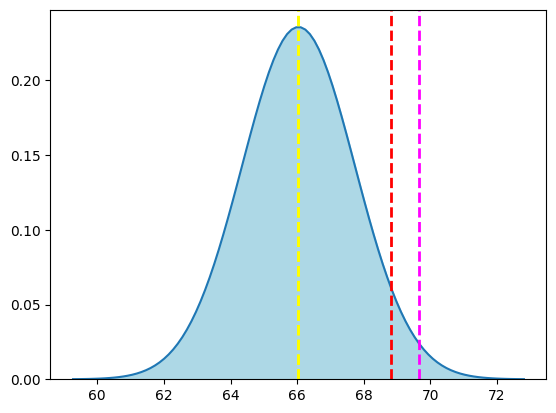

In [9]:
np.random.seed(123)
nonMath = np.random.normal(66.0, 1.5, 100)
math = np.random.normal(66.55, 1.5, 100)
print("non-math sample mean:" + str(nonMath.mean()))
print("math sample mean:" + str(math.mean()))

# Independent T-Test
t,p = stats.ttest_ind(math, nonMath, alternative='greater')
print("t-statistic:" + str(t))
print("p-value:" + str(p))

mean = nonMath.mean()
std = nonMath.std()
x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)
a = np.linspace(mean - 4 * std, mean + 4 * std, 100)
b = norm.pdf(a, mean, std)
plt.fill_between(a, b, 0, color = 'lightblue') 
plt.ylim(0);
plt.axvline(mean, color='yellow', linestyle='dashed', linewidth=2)

ci = stats.norm.interval(0.90, mean, std)

# show the hypothesized population mean
plt.axvline(mean, color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(mean + t*std, color='magenta', linestyle='dashed', linewidth=2)
plt.show()

### 結論：p值<0.05，數理科學生與非數理科學生學習統計，檢定考試成績有顯著差異。

## 配對檢定(Paired Tests)：檢定兩相依的樣本，是否有改善。
## 學生同時參加期中及期末考試，檢定期末時學生是否有顯著的進步，因兩次考試都是以同一組學生作實驗，故稱為【配對檢定】(Paired Tests)。

t-statistic:2.3406857739212583
p-value:0.010627054465344237


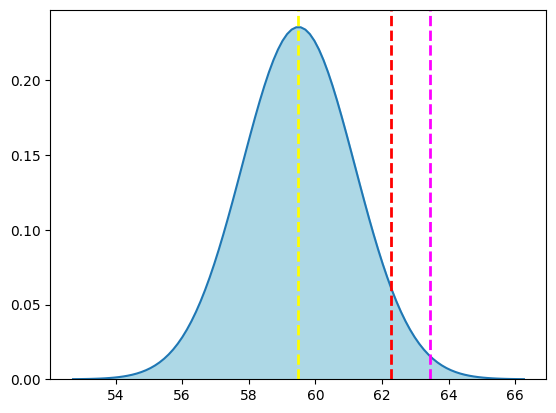

In [10]:
np.random.seed(123)
midTerm = np.random.normal(59.45, 1.5, 100)
endTerm = np.random.normal(60.05, 1.5, 100)

# Paired (related) test
t,p = stats.ttest_rel(endTerm, midTerm, alternative='greater')
# ttest_rel is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
print("t-statistic:" + str(t))
print("p-value:" + str(p))

mean = midTerm.mean()
std = midTerm.std()
x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)
a = np.linspace(mean - 4 * std, mean + 4 * std, 100)
b = norm.pdf(a, mean, std)
plt.fill_between(a, b, 0, color = 'lightblue') 
plt.ylim(0);
plt.axvline(mean, color='yellow', linestyle='dashed', linewidth=2)

ci = stats.norm.interval(0.90, mean, std)

# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(mean + t*std, color='magenta', linestyle='dashed', linewidth=2)
plt.show()

### 結論：p值<0.05，期末時學生有顯著的進步。

# P-Hacking：在進行實驗時，故意挑選好的樣本放在實驗組，造成實驗有顯著差異。

# [壞血：一個矽谷巨頭的秘密與謊言](https://www.books.com.tw/products/CN11635399)
https://read01.com/zh-tw/NNMo5m3.html#.Y0Ez5XZBw2w